# **Data Analysis on SPAM EMAIL DETECTION**

* Started with 3002 Observation and 2 variables
* Ended with 2888 Observations and 6 variables

## 1) Importing Necessary libraries needed for this task

In [1]:
import pandas as pd
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
corpus = pd.read_csv('corpus.csv')

In [3]:
corpus.head()

,email,Spam (1) or ham (0)
0,"('Re: New Sequences Window', 'Date: Wed...",0.0
1,"('[zzzzteana] RE: Alexander', ""Martin A posted...",0.0
2,"('[zzzzteana] Moscow bomber', ""Man Threatens E...",0.0
3,"(""[IRR] Klez: The Virus That Won't Die"", ""Kle...",0.0
4,('Re: [zzzzteana] Nothing like mama used to ma...,0.0


In [4]:
corpus.columns = corpus.columns.str.replace('Spam (1) or ham (0)', 'spam')

In [5]:
corpus.head()

,email,spam
0,"('Re: New Sequences Window', 'Date: Wed...",0.0
1,"('[zzzzteana] RE: Alexander', ""Martin A posted...",0.0
2,"('[zzzzteana] Moscow bomber', ""Man Threatens E...",0.0
3,"(""[IRR] Klez: The Virus That Won't Die"", ""Kle...",0.0
4,('Re: [zzzzteana] Nothing like mama used to ma...,0.0


## 2) Data Cleaning

In [6]:
corpus['spam'].unique()

array([0., 1.])

In [7]:
corpus['spam']= corpus.spam.astype(int)

In [8]:
type(corpus['spam'][0])

numpy.int32

In [9]:
corpus.isnull().sum()

email    0
spam     0
dtype: int64

In [10]:
corpus['email'][1]

'(\'[zzzzteana] RE: Alexander\', "Martin A posted:\\nTassos Papadopoulos, the Greek sculptor behind the plan, judged that the\\n limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the\\n Mount Athos monastic community, was ideal for the patriotic sculpture. \\n \\n As well as Alexander\'s granite features, 240 ft high and 170 ft wide, a\\n museum, a restored amphitheatre and car park for admiring crowds are\\nplanned\\n---------------------\\nSo is this mountain limestone or granite?\\nIf it\'s limestone, it\'ll weather pretty fast.\\n\\n------------------------ Yahoo! Groups Sponsor ---------------------~-->\\n4 DVDs Free +s&p Join Now\\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM\\n---------------------------------------------------------------------~->\\n\\nTo unsubscribe from this group, send an email to:\\nforteana-unsubscribe@egroups.com\\n\\n \\n\\nYour use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/ \\n\\n\\n\\n")'

In [11]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   3002 non-null   object
 1   spam    3002 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 35.3+ KB


In [12]:
corpus.sample()

,email,spam
2124,"('Equitable prepares to compensate 70,000', 'U...",0


In [13]:
corpus.sample(5)

,email,spam
1645,"('[Spambayes] test sets?', '[Anthony Baxter]\n...",0
620,('Re: [VoID] a new low on the personals tip......,0
798,('Re: EBusiness Webforms: cluetrain has left t...,0
2451,"('Re: alsa:bass and treble', 'Nova Nova wrote:...",0
1653,"('[Spambayes] Deployment', '>>>>> ""NS"" == Neil...",0


In [14]:
corpus.duplicated().sum()

76

In [15]:
corpus = corpus.drop_duplicates()

In [16]:
corpus.shape

(2926, 2)

## 3) Exploratory Data Analysis

In [17]:
corpus.head(2)

,email,spam
0,"('Re: New Sequences Window', 'Date: Wed...",0
1,"('[zzzzteana] RE: Alexander', ""Martin A posted...",0


In [18]:
corpus['spam'].value_counts()

spam
0    2445
1     481
Name: count, dtype: int64

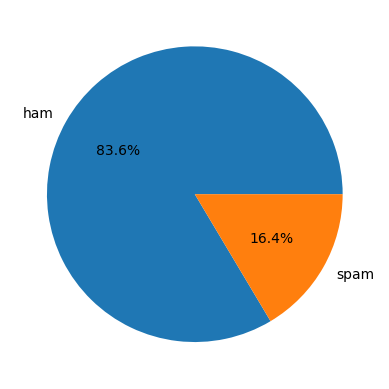

In [19]:
plt.pie(corpus['spam'].value_counts(), labels = ['ham', 'spam'], autopct = '%1.1f%%')
plt.show()

In [20]:
df=corpus.copy()

In [21]:
#df['names']= df['spam'].replace(0,'ham')

In [22]:
#df['names']= df['names'].replace(1,'spam')

#The comment below also creates a new variable as the above two cells.
df['category']=df['spam'].apply(lambda x:'spam' if x==1 else 'ham')

In [23]:
values = []
df['spam']=df['spam'].astype(str)
for x in df['spam']:
    z = '1'
    if z in x:
        values.append('spam')
    else:
        values.append('ham')

df['spam']=df['spam'].astype(int)

df['category'] = values

In [24]:
df['category'].value_counts()

category
ham     2445
spam     481
Name: count, dtype: int64

In [25]:
df['category'].unique()

array(['ham', 'spam'], dtype=object)

In [26]:
df.head()

,email,spam,category
0,"('Re: New Sequences Window', 'Date: Wed...",0,ham
1,"('[zzzzteana] RE: Alexander', ""Martin A posted...",0,ham
2,"('[zzzzteana] Moscow bomber', ""Man Threatens E...",0,ham
3,"(""[IRR] Klez: The Virus That Won't Die"", ""Kle...",0,ham
4,('Re: [zzzzteana] Nothing like mama used to ma...,0,ham


In [27]:
df.spam.nunique()

2

In [28]:
df['num_characters'] = df['email'].apply(len)

!pip install nltk

nltk.download('punkt')
nltk.download('stopwords')

In [29]:
# num of words
df['num_words'] = df['email'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df['email'][0]

'(\'Re: New Sequences Window\', \'Date:        Wed, 21 Aug 2002 10:54:46 -0500\\n    From:        Chris Garrigues \\n    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>\\n\\n\\n  | I can\\\'t reproduce this error.\\n\\nFor me it is very repeatable... (like every time, without fail).\\n\\nThis is the debug log of the pick happening ...\\n\\n18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}\\n18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury\\n18:19:04 Ftoc_PickMsgs {{1 hit}}\\n18:19:04 Marking 1 hits\\n18:19:04 tkerror: syntax error in expression "int ...\\n\\nNote, if I run the pick command by hand ...\\n\\ndelta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury\\n1 hit\\n\\nThat\\\'s where the "1 hit" comes from (obviously).  The version of nmh I\\\'m\\nusing is ...\\n\\ndelta$ pick -version\\npick -- nmh-1.0.4 [co

In [31]:
df.head(1)

,email,spam,category,num_characters,num_words
0,"('Re: New Sequences Window', 'Date: Wed...",0,ham,1645,269


In [32]:
df['num_sentences'] = df['email'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,email,spam,category,num_characters,num_words,num_sentences
0,"('Re: New Sequences Window', 'Date: Wed...",0,ham,1645,269,2
1,"('[zzzzteana] RE: Alexander', ""Martin A posted...",0,ham,958,218,4
2,"('[zzzzteana] Moscow bomber', ""Man Threatens E...",0,ham,1822,340,8
3,"(""[IRR] Klez: The Virus That Won't Die"", ""Kle...",0,ham,1204,197,3
4,('Re: [zzzzteana] Nothing like mama used to ma...,0,ham,1137,240,5


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2926.000000,2926.000000,2926.000000
mean,1647.536910,283.343472,7.863636
std,5727.500501,656.537867,19.271258
min,10.000000,8.000000,1.000000
25%,440.000000,80.250000,2.000000
50%,885.000000,165.000000,4.000000
75%,1575.250000,292.000000,8.000000
max,205010.000000,16782.000000,421.000000


In [35]:
df[df['spam']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2445.000000,2445.000000,2445.000000
mean,1515.458078,271.140286,7.329243
std,5307.302372,618.079025,17.933387
min,20.000000,12.000000,1.000000
25%,444.000000,82.000000,2.000000
50%,877.000000,165.000000,4.000000
75%,1523.000000,290.000000,7.000000
max,205010.000000,16782.000000,421.000000


In [36]:
df[df['spam']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,481.000000,481.000000,481.000000
mean,2318.914761,345.374220,10.580042
std,7479.379340,822.751829,24.834333
min,10.000000,8.000000,1.000000
25%,418.000000,55.000000,2.000000
50%,963.000000,165.000000,5.000000
75%,1994.000000,295.000000,10.000000
max,128110.000000,13082.000000,360.000000


In [37]:
# Define a function to clean the email column
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+|nhttp\S+', '', text, flags=re.MULTILINE)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove dates (format: yyyy-mm-dd)
    text = re.sub(r'\d{4}-\d{2}-\d{2}', '', text)
    
    # Remove replies (assuming replies are preceded by a username or any text)
    text = re.sub(r'reply to this', '', text, flags=re.IGNORECASE)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    text = text.strip('\\n')

    text = text.strip('\n')
    
    return text

# Apply the function to the email column
df['email'].apply(clean_text)

0       ('Re: New Sequences Window', 'Date: Wed, 21 Au...
1       ('[zzzzteana] RE: Alexander', "Martin A posted...
2       ('[zzzzteana] Moscow bomber', "Man Threatens E...
3       ("[IRR] Klez: The Virus That Won't Die", "Klez...
4       ('Re: [zzzzteana] Nothing like mama used to ma...
                              ...                        
2997    ('Do you need a second MORTGAGE? 22956', "\n\n...
2998                                           ('', '[]')
2999    ('Earn Your Fortune on eBay!', '\n\n\n\n\n\n\n...
3000    ('HK Email marking !', "\n\n\n(Hello,This is C...
3001    (None, 'mv 00001.7848dde101aa985090474a91ec93f...
Name: email, Length: 2926, dtype: object

## 4) Data Visualization

In [38]:
df_new =df[df['num_characters'] < 10000]

In [39]:
df_new['num_characters'].count()

2888

In [40]:
df_new.shape

(2888, 6)

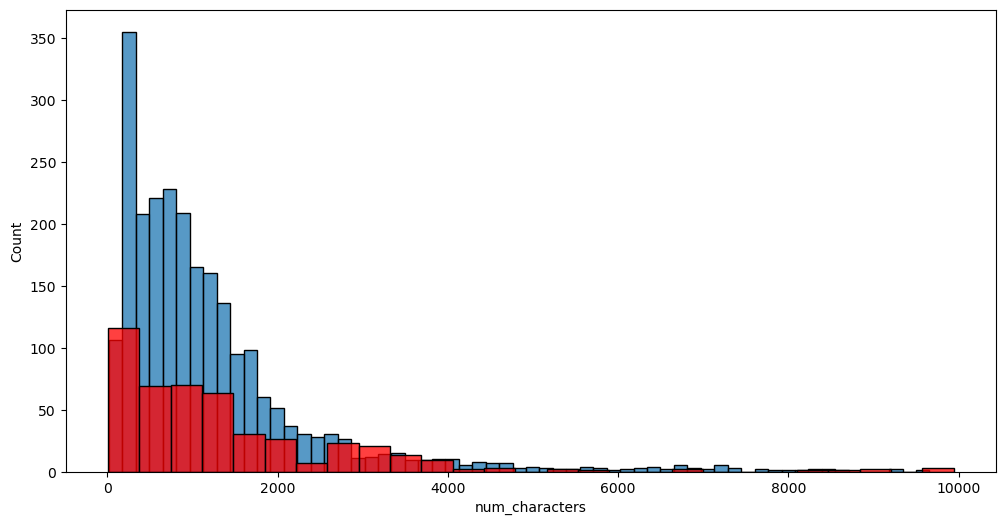

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df_new[df_new['spam'] == 0]['num_characters'])
sns.histplot(df_new[df_new['spam'] == 1]['num_characters'],color='red');

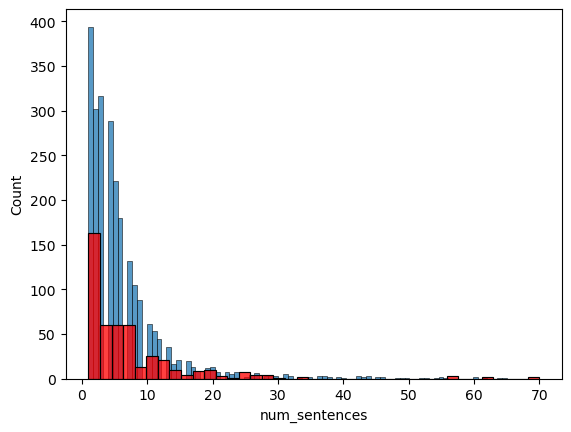

In [42]:
plt.figure(figure= (10,6))
sns.histplot(df_new[df_new['spam']==0]['num_sentences'])
sns.histplot(df_new[df_new['spam']==1]['num_sentences'],color = 'red');

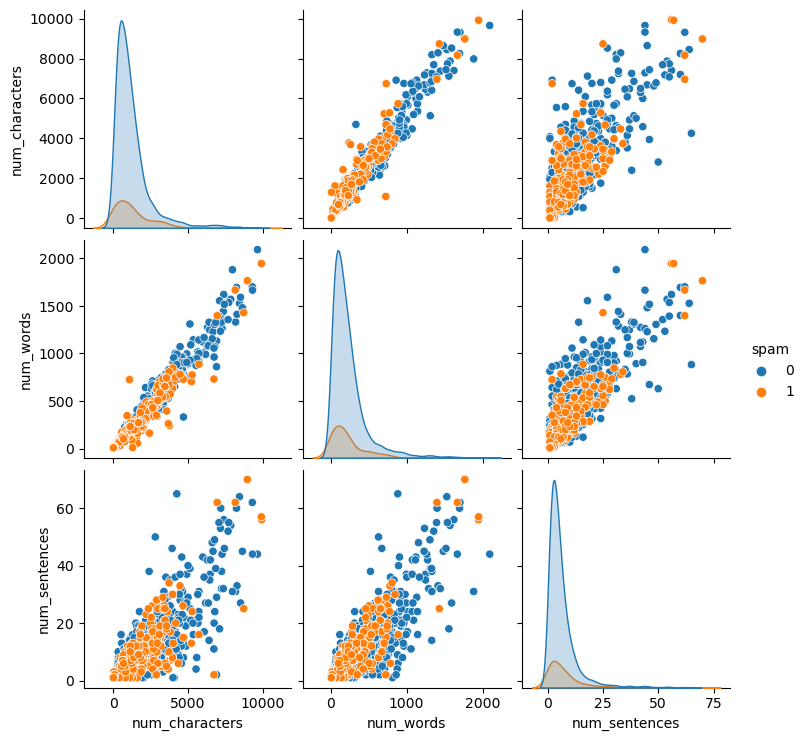

In [43]:
sns.pairplot(df_new,hue='spam');

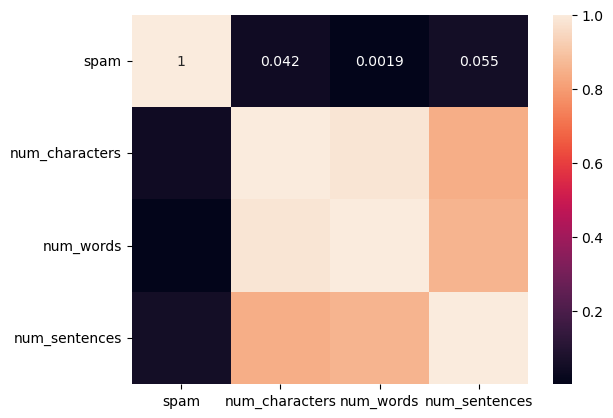

In [44]:
num_df = df_new.select_dtypes(include=['float', 'int'])
corr = num_df.corr()
sns.heatmap(corr,annot=True);

In [45]:
print(corr)

                    spam  num_characters  num_words  num_sentences
spam            1.000000        0.041868   0.001859       0.054706
num_characters  0.041868        1.000000   0.981139       0.840451
num_words       0.001859        0.981139   1.000000       0.859299
num_sentences   0.054706        0.840451   0.859299       1.000000


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
HAM = df_new[df_new['spam']==0]

In [48]:
SPAM = df_new[df_new['spam']==1]

In [49]:
# Initialize an empty list to store words
ham_word = []

# Iterate through each row in the specified column
for sentence in HAM['email']:
    # Split the sentence into words and extend the words_list
    ham_word.extend(sentence.split())
# Print the length of the list
#print(f'Total number of words: {len(spam_word)}')
# Print the resulting list of words
#print(ham_word)

In [50]:
# Save the list of words to a text file
with open('ham_word.txt', 'w', encoding='utf-8') as f:
    for word in ham_word:
        f.write(word + '\n')


In [51]:
ham_text = open('hamer_word.txt', mode = 'r', encoding='utf-8').read()
stopwords = STOPWORDS

In [52]:
wc = WordCloud(
    background_color = 'white',
    stopwords= stopwords,
    height = 700,
    width = 700
)

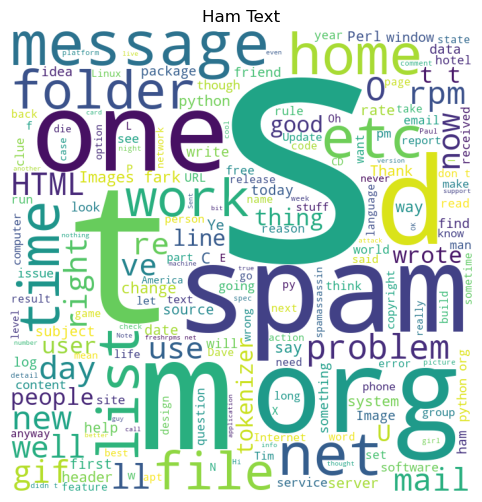

In [53]:
ham_wc = wc.generate(ham_text)
plt.figure(figsize=(16,6))
plt.imshow(ham_wc)
plt.title('Ham Text')
plt.axis('off');

In [54]:


# Initialize an empty list to store words
spam_word = []

# Iterate through each row in the specified column
for sentence in SPAM['email']:
    # Split the sentence into words and extend the words_list
    spam_word.extend(sentence.split())
# Print the length of the list
#print(f'Total number of words: {len(spam_word)}')
# Print the resulting list of words
#print(spam_word)


In [55]:
# Save the list of words to a text file
with open('spam_word.txt', 'w', encoding='utf-8') as f:
    for word in spam_word:
        f.write(word + '\n')

In [56]:
spam_text = open('spamer_word.txt', mode = 'r', encoding='utf-8').read()
stopwords = STOPWORDS

In [57]:
wc = WordCloud(
    background_color = 'white',
    stopwords= stopwords,
    height = 700,
    width = 700)

In [58]:
spam_wc = wc.generate(spam_text)

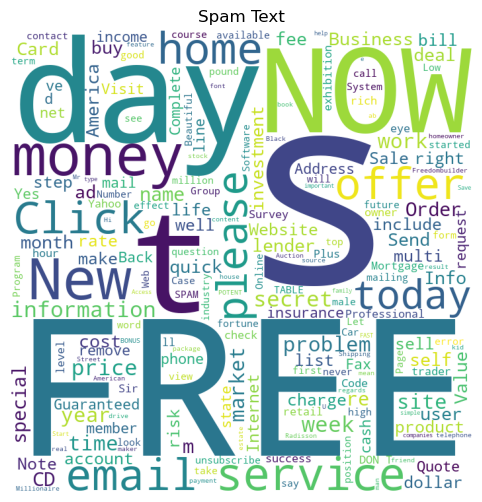

In [59]:
plt.figure(figsize=(16,6))
plt.imshow(spam_wc)
plt.title('Spam Text')
plt.axis('off');

## 5) Machine Learning: Testing and training of model

In [60]:

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

In [61]:
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(df['email'],df['spam'],test_size=0.25)

In [62]:
# Create a function to Train and Test model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

## 6) ML Model: Multinomial Naive Bayes

In [63]:
# ML Model - 1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])


Train ROC AUC: 0.9605121308185767
Test ROC AUC: 0.9193548387096775


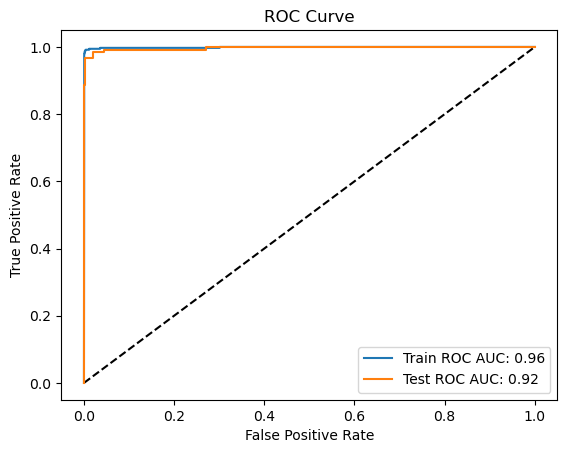


Confusion Matrix:


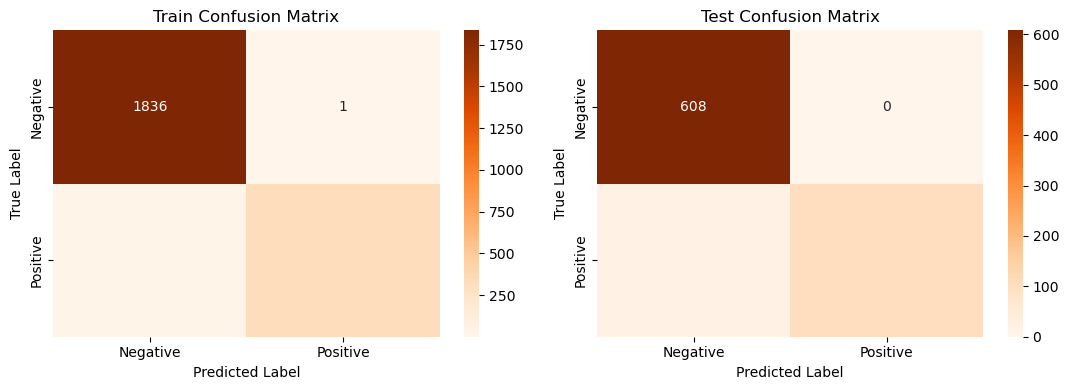


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.984979 | 0.999456 |   0.992164 | 1837        |
| 1            |    0.99697  | 0.921569 |   0.957787 |  357        |
| accuracy     |    0.986782 | 0.986782 |   0.986782 |    0.986782 |
| macro avg    |    0.990974 | 0.960512 |   0.974976 | 2194        |
| weighted avg |    0.98693  | 0.986782 |   0.986571 | 2194        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.968153 | 1        |   0.983819 | 608        |
| 1            |    1        | 0.83871  |   0.912281 | 124        |
| accuracy     |    0.972678 | 0.972678 |   0.972678 |   0.972678 |
| macro avg    |    0.984076 | 0.919355 |   0.94805  | 732        |
| weighted avg |    0.973548 | 0.972678 |   0.9717

In [64]:
# Visualizing evaluation Metric Score chart
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)


## Which Evaluation metrics Considered

* **Recall:** High recall ensures that most spam emails are detected, reducing the risk of spam getting through. Its gives 97.68% accuracy for recall test set.


## 7) Email Spam Detection System Testing

In [65]:
# Defining a function for the Email Spam Detection System
def detect_spam(email_text):

    # Using the trained classifier to make a prediction
    prediction = clf.predict([email_text])

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"

In [83]:
# Test to confirm our prediction
sample_email = 'Kindly submit your SSN to receive your share of covid funds'
result = detect_spam(sample_email)
print(result)

This is a Spam Email!


In [86]:
# Test to confirm our prediction
sample_email = 'Massive giveaway from MTN, Celebrating Chivido 2024, Kindly click this link to receive your share. And from govt bonus'
result = detect_spam(sample_email)
print(result)

This is a Spam Email!
